In [255]:
#problem statement-We need to find out whethter the cloth brought buy women is recommended to another women or not

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



In [260]:
df=pd.read_csv('women.csv')
df.head()

,Serial,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division_Name,Department_Name,Class_Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [261]:
df.shape


(23488, 11)

In [143]:
df.isna().sum()                        #NAN Values in Title

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [262]:
#Preprocessing


# we are removing unnecessary coumns and storing new dataset to df1

df1=df.iloc[:,[1,2,5,6,7,8,9,10]]
df1



,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division_Name,Department_Name,Class_Name
0,767,33,4,1,0,Initmates,Intimate,Intimates
1,1080,34,5,1,4,General,Dresses,Dresses
2,1077,60,3,0,0,General,Dresses,Dresses
3,1049,50,5,1,0,General Petite,Bottoms,Pants
4,847,47,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...
23483,1104,31,3,0,1,General Petite,Dresses,Dresses
23484,1084,28,3,1,2,General,Dresses,Dresses
23485,1104,52,5,1,22,General Petite,Dresses,Dresses
23486,1097,32,5,1,21,General Petite,Dresses,Dresses


In [263]:
df1.shape


(23488, 8)

In [160]:
df1.isna().sum()                      #NAN values in last three columns, we can remove 14 nan values are size of nan vlaue is small with respective to the dataset

Clothing ID                 0
Age                         0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              14
Department Name            14
Class Name                 14
dtype: int64

In [337]:
df2 = df1.dropna() 
df2 = df2.reset_index() # reset's row indexes in case any rows were dropped
df2.shape

(23474, 9)

In [339]:
df2.isna().sum()  #no Nul values

index                      0
Clothing ID                0
Age                        0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division_Name              0
Department_Name            0
Class_Name                 0
dtype: int64

In [340]:
  # only 14 nan values has been removed and our dataset saving in df2

In [341]:
df2.info()          #We need to convert OBJ to int value with help of one hot encoder to complete preprecessing and starting EDA part

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23474 entries, 0 to 23473
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    23474 non-null  int64 
 1   Clothing ID              23474 non-null  int64 
 2   Age                      23474 non-null  int64 
 3   Rating                   23474 non-null  int64 
 4   Recommended IND          23474 non-null  int64 
 5   Positive Feedback Count  23474 non-null  int64 
 6   Division_Name            23474 non-null  object
 7   Department_Name          23474 non-null  object
 8   Class_Name               23474 non-null  object
dtypes: int64(6), object(3)
memory usage: 1.6+ MB


In [266]:
{column:len(df[column].unique()) for column in df2.select_dtypes('object').columns} #We have 21 ,7 and 4 differnet obj

{'Class_Name': 21, 'Department_Name': 7, 'Division_Name': 4}

In [267]:
{column:len(df[column].unique()) for column in df2.select_dtypes('object').columns}.keys()

dict_keys(['Division_Name', 'Department_Name', 'Class_Name'])

In [269]:
#introducing Dumm varieable to check total class value

pd.get_dummies(df2['Class_Name'])

#introducing Dumm varieable to check total class value, we will drop class name from df2 as it has 20 categrical values

,Blouses,Casual bottoms,Chemises,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23483,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23484,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23485,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23486,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [348]:
#pd.get_dummies(df2['Department_Name'])  #This is imp to keep in our dataset set as it showing specific paramters along with division name

In [347]:
#pd.get_dummies(df2['Division_Name']) 

In [352]:
#Converting Dvision name and Department name in obj to int


df2.Division_Name[df2.Division_Name=='General'] = 1
df2.Division_Name[df2.Division_Name=='General Petite'] = 2
df2.Division_Name[df2.Division_Name=='Initmates']= 3


df2.Department_Name[df2.Department_Name=='Bottoms']=1
df2.Department_Name[df2.Department_Name=='Dresses']=2
df2.Department_Name[df2.Department_Name=='Intimate']=3
df2.Department_Name[df2.Department_Name=='Jackets']=4
df2.Department_Name[df2.Department_Name=='Tops']=5
df2.Department_Name[df2.Department_Name=='Trend']=6


df2["Department_Name"]= df2["Department_Name"].astype(int) 
df2["Division_Name"]= df2["Division_Name"].astype(int) 

df2.info()  #Object are converted into int



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23474 entries, 0 to 23473
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    23474 non-null  int64 
 1   Clothing ID              23474 non-null  int64 
 2   Age                      23474 non-null  int64 
 3   Rating                   23474 non-null  int64 
 4   Recommended IND          23474 non-null  int64 
 5   Positive Feedback Count  23474 non-null  int64 
 6   Division_Name            23474 non-null  int64 
 7   Department_Name          23474 non-null  int64 
 8   Class_Name               23474 non-null  object
dtypes: int64(8), object(1)
memory usage: 1.6+ MB


In [353]:
#Now we will remove last column and store in df3

df3=df2.iloc[:,1:8]
df3.head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division_Name,Department_Name
0,767,33,4,1,0,3,3
1,1080,34,5,1,4,1,2
2,1077,60,3,0,0,1,2
3,1049,50,5,1,0,2,1
4,847,47,5,1,6,1,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb707546d0>]],
      dtype=object)

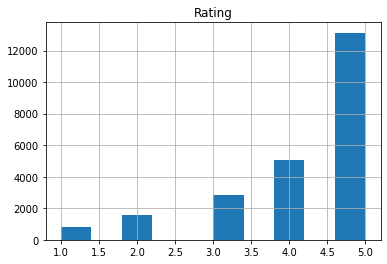

In [285]:
#Performing EDA to find co relation between two columns

import matplotlib.pyplot as plt
import seaborn as sns

df3.hist(column='Rating')  #hist showing we got 12k 5 star ratings

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb70828250>]],
      dtype=object)

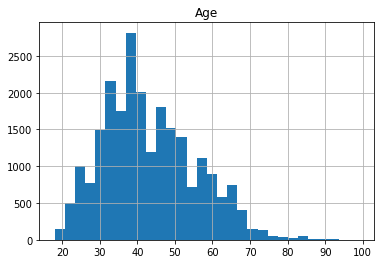

In [284]:
df3.hist(column='Age',bins=30)    #maximum women are of 40 years old

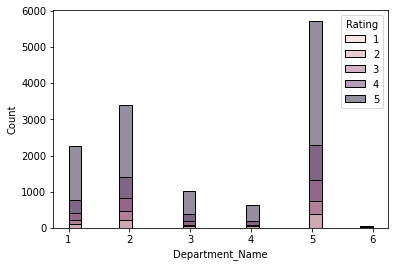

In [355]:
sns.histplot(data=df3, x="Department_Name", hue="Rating")  #department 5 th get hightest rating

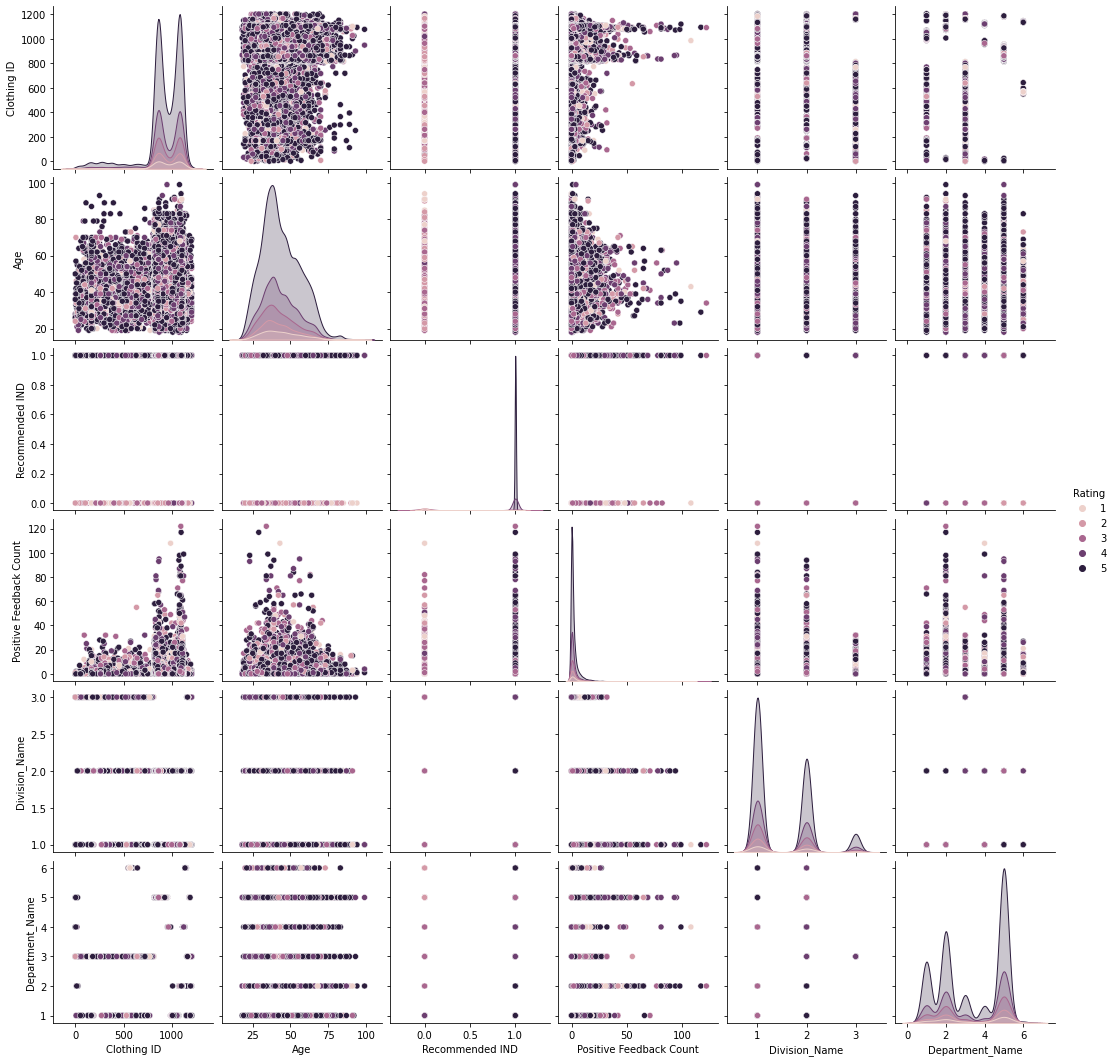

In [364]:
sns.pairplot(data=df3,hue='Rating')

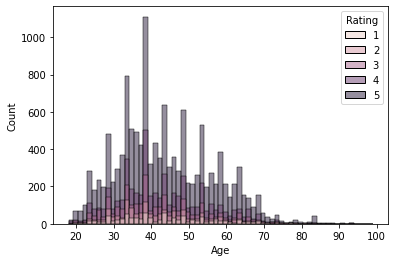

In [81]:
sns.histplot(data=df, x="Age", hue="Rating")  #we got highest rating from 40 year old women


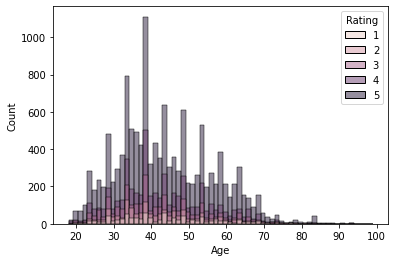

In [85]:
sns.histplot(data=df, x="Age", hue="Rating")   #We get highest rating from age of 40 years old, it means 40 year old most likely to recommend another women to buy colothes of particular brand

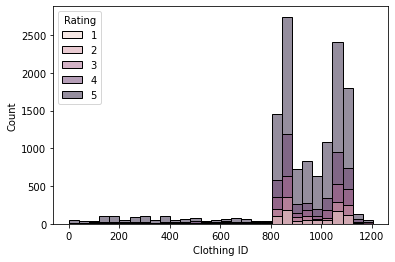

In [87]:
sns.histplot(data=df, x="Clothing ID", hue="Rating",bins=30) #Clothig ID 800 and 1100 got best rating amoong clothing ID

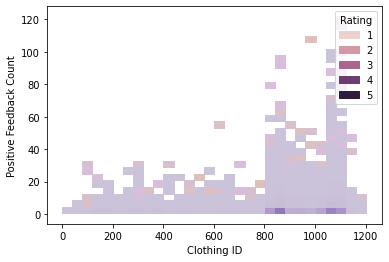

In [91]:
sns.histplot(data=df, x="Clothing ID",y='Positive Feedback Count', hue="Rating",bins=30,color='r')  #clothing ID from 800 to 1100 got 40 postive feedback each with highest rating to buy. 

In [113]:
df['Department Name'].isna().sum()

0

In [116]:
df.isna().sum()  #We are getting 3800 NAN values as Title, so we drop that columns from our dataset for further ML Algorithms

#USing Dropna fuction we have dropped the rows with NAN values and reset the index
         
                    #Also getting 14 rows NAN values from each Department Name,Class Name,Division Name

level_0                    0
index                      0
Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [365]:
df3.head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division_Name,Department_Name
0,767,33,4,1,0,3,3
1,1080,34,5,1,4,1,2
2,1077,60,3,0,0,1,2
3,1049,50,5,1,0,2,1
4,847,47,5,1,6,1,5


In [366]:
df3.shape

(23488, 11)

In [368]:
{column:len(df[column].unique()) for column in df3.select_dtypes('object').columns} #no objects are present in following clumns.

{}

In [39]:
#Splitting data in X and y, dependent and independent variable

In [371]:
X=df3.iloc[:,[0,1,2,4,5,6]].values
y=df3.iloc[:,3].values

In [372]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [373]:
#Training XGBoost on traiining set with logistic Regression

from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [374]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0
                                )
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [375]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [376]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

from sklearn.model_selection import cross_val_score  #Applyinh k fold validation test
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


[[ 926  316]
 [ 180 5621]]
Accuracy: 92.51 %
Standard Deviation: 0.53 %


In [379]:
#KNN  86% Percent accurate on test set based on our date whether women recommend to buy cloths from selected division 


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

from sklearn.model_selection import cross_val_score  #Applyinh k fold validation test
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 1]]
[[ 472  770]
 [ 129 5672]]
Accuracy: 86.68 %
Standard Deviation: 0.60 %


In [380]:
#Naive Bayes 93 Percent accurate on test set based on our date whether women recommend to buy cloths from selected division 

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

from sklearn.model_selection import cross_val_score  #Applyinh k fold validation test
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 1]]
[[1175   67]
 [ 395 5406]]
Accuracy: 93.15 %
Standard Deviation: 0.51 %


In [381]:
#Kernel SVM-82 % accurate

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

from sklearn.model_selection import cross_val_score  #Applyinh k fold validation test
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]
[[   0 1242]
 [   0 5801]]
Accuracy: 82.17 %
Standard Deviation: 0.00 %


In [386]:
#polynomial regression-82%accurate on 70-30 train-test data

In [383]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

from sklearn.model_selection import cross_val_score  #Applyinh k fold validation test
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

from xgboost import XGBRegressor
RandomForestRegressor = XGBClassifier()
classifier.fit(X_train, y_train)


[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]
[[   0 1242]
 [   0 5801]]
Accuracy: 82.17 %
Standard Deviation: 0.00 %


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [387]:
#Decision Tree Classification-91% accurate

In [385]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

from sklearn.model_selection import cross_val_score  #Applyinh k fold validation test
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

from xgboost import XGBRegressor
RandomForestRegressor = XGBClassifier()
classifier.fit(X_train, y_train)




[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 1]]
[[ 964  278]
 [ 319 5482]]
Accuracy: 91.52 %
Standard Deviation: 0.43 %


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [388]:
#we are now checking for K nearest neighbour  and heirarchical clustering to find cluster based on above df3 paramters
df3.head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division_Name,Department_Name
0,767,33,4,1,0,3,3
1,1080,34,5,1,4,1,2
2,1077,60,3,0,0,1,2
3,1049,50,5,1,0,2,1
4,847,47,5,1,6,1,5


In [426]:
X=df3.iloc[:,0:7].values  #finding cluster for Clothing ID and Rating ,so selecting only 2,3 column

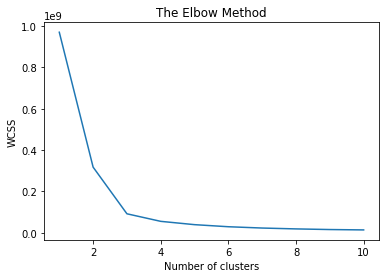

In [427]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [392]:
# We will keep cluster K=4 based on above 

In [428]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

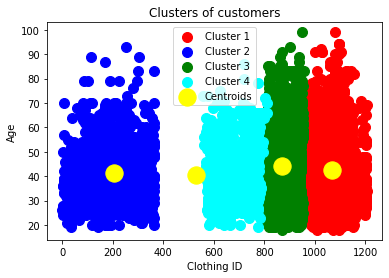

In [430]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Clothing ID')
plt.ylabel('Age')
plt.legend()
plt.show()

In [417]:
#Hierarchical clustering

In [431]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

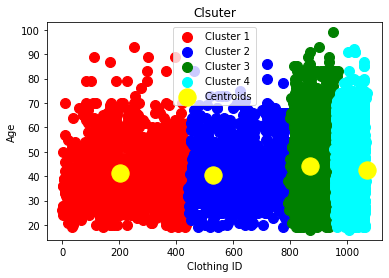

In [433]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clsuter')
plt.xlabel('Clothing ID')
plt.ylabel('Age')
plt.legend()
plt.show()